# Biot-Savart Law

Use Biot-Savart's Law for the magnetic field induced by a thin-wire current,
$$
d\vec{B}(\vec{r}) = \frac{\mu_0I}{4\pi}\frac{d\vec{r}'\times(\vec{r}-\vec{r}')}{|\vec{r}-\vec{r}'|^3},
$$
to construct a program calculating the $\vec{B}$-field for a quandratic current loop (side-length $1m$, $\mu I = 8$ in SI units, running counter-clockwise) lying centered in the x-y plane. 

Dived every side into $N$ segments, and the length of every segment is $dl = |d\vec{r}|=\frac{sl}{N}$. The infinitesimal current segment $d\vec{r}'(dx', dy', dz')$ along every side of the wire, as well as $i^{th}$ segment $\vec{r}'(x', y', z')$ can be denoted as the follows.

The top side,
$$
dx' = -dl, dy' = 0, dz' = 0\\
x'[i] = i\times dl-\frac{sl}{2}, y'[i]=\frac{sl}{2}, z'[i]=0
$$
The right side,
$$
dx' = 0, dy' = dl, dz' = 0\\
x'[i] = \frac{sl}{2}, y'[i]=i\times dl-\frac{sl}{2}, z'[i]=0
$$
The bottom side,
$$
dx' = dl, dy' = 0, dz' = 0\\
x'[i] = i\times dl-\frac{sl}{2}, y'[i]=-\frac{sl}{2}, z'[i]=0
$$
The left side,
$$
dx' = 0, dy' = -dl, dz' = 0\\
x'[i] = -\frac{sl}{2}, y'[i]=i\times dl-\frac{sl}{2}, z'[i]=0
$$

Considering one point $\vec{r}=[x, y, z]$ in the space, the magenetic field at that spot induced by every wire segment can be noted as $dB = [dB_x, dB_y, dB_z]$. Integrate all the magenetic fields induced by each wire segment, we get the magnetic field at position $\vec{r}$.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
sl = 1.0 # side-length
A = 2/np.pi # the coeficient in Biot-Savart's law

In [3]:
def Biot_Savart(r, rp, drp):
    dB = A*np.cross(drp, (r-rp))/(np.linalg.norm(r-rp))**3
    return dB   

In [4]:
def calculate_field(r, N):
    dl = sl/N
    B = np.zeros(3)
    # up side
    drp_up = np.array([-dl, 0, 0])
    drp_right = np.array([0, dl, 0])
    drp_down = np.array([dl, 0, 0])
    drp_left = np.array([0, -dl, 0])
    for i in range(N):
        rp = np.array([i*dl-sl/2, sl/2, 0]) # up side
        B += Biot_Savart(r, rp, drp_up)
        rp = np.array([sl/2, i*dl-sl/2, 0]) # right side
        B += Biot_Savart(r, rp, drp_right)
        rp = np.array([i*dl-sl/2, -sl/2, 0]) # down side
        B += Biot_Savart(r, rp, drp_down)
        rp = np.array([-sl/2, i*dl-sl/2, 0]) # left side
        B += Biot_Savart(r, rp, drp_left)
    return B    

Calculate the $x-, y-$ and $z-$compnents of the magnetic field for

(a) $x=y=0$ m as a function of $z$ and compare to the analytic result for a circular current loop with the same area as the square.

Due to the symmetry of the wire, it is easy to find that $B_x = B_y = 0$ along the line $x=y=0$. Only $B_z$ needs to be calculated.
$$
B_z = A\frac{2\pi R\left|\vec{r}-\vec{R}\right|}{(R^2+z^2)^{3/2}}sin(\theta)\\
=A\frac{2\pi R\left|\vec{r}-\vec{R}\right|}{(R^2+z^2)^{3/2}}\frac{R}{\left|\vec{r}-\vec{R}\right|}\\
=A\frac{2\pi R^2}{(R^2+z^2)^{3/2}}
$$
where $R$ is hte radius of the circular wire, and $\theta$ is the angle between $z-$axis and $\vec{r}-\vec{R}$. 

In [5]:
N = 501
z = np.linspace(-10, 10, 201)
length = len(z)
B_array = np.zeros((length, 3))
for i in range(length):
    r = np.array([0,0,z[i]])
    B_array[i] = calculate_field(r, N)    

In [6]:
#analytical way
R_square= sl**2/np.pi 
Bz_Ana = 2*A*np.pi*R_square/(R_square+z**2)**(3/2)

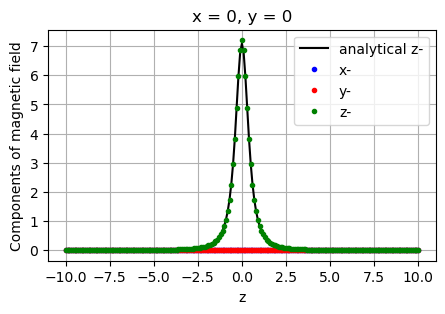

In [7]:
plt.figure(figsize=(5,3))
plt.plot(z, Bz_Ana, '-k', label='analytical z-')
plt.plot(z, B_array[:,0], '.b', label='x-')
plt.plot(z, B_array[:,1], '.r', label='y-')
plt.plot(z, B_array[:,2], '.g', label='z-')
plt.xlabel('z')
plt.ylabel('Components of magnetic field')
plt.title('x = 0, y = 0')
plt.legend()
plt.grid()
plt.show()

(b) $z=1$m, $y=0$ as a function of $x$

In [8]:
N = 501
x = np.linspace(-10, 10, 201)
length = len(x)
B_array = np.zeros((length, 3))
for i in range(length):
    r = np.array([x[i],0,1])
    B_array[i] = calculate_field(r, N)   

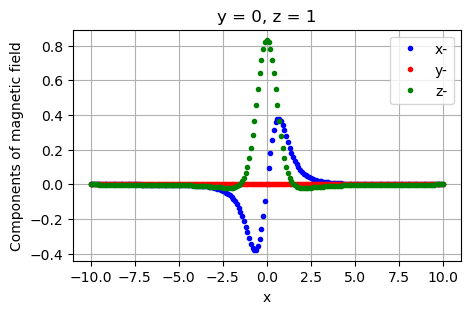

In [9]:
plt.figure(figsize=(5,3))
plt.plot(x, B_array[:,0], '.b', label='x-')
plt.plot(x, B_array[:,1], '.r', label='y-')
plt.plot(x, B_array[:,2], '.g', label='z-')
plt.xlabel('x')
plt.ylabel('Components of magnetic field')
plt.title('y = 0, z = 1')
plt.legend()
plt.grid()
plt.show()

(c) $y=0$m, $x=0.5$m as a function of $z$

In [10]:
N = 501
z = np.linspace(-10, 10, 201)
length = len(z)
B_array = np.zeros((length, 3))
for i in range(length):
    r = np.array([0.5,0,z[i]])
    B_array[i] = calculate_field(r, N)

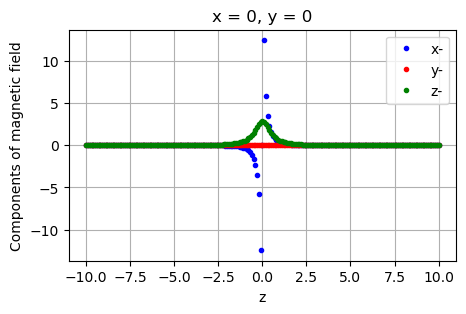

In [11]:
plt.figure(figsize=(5,3))
plt.plot(z, B_array[:,0], '.b', label='x-')
plt.plot(z, B_array[:,1], '.r', label='y-')
plt.plot(z, B_array[:,2], '.g', label='z-')
plt.xlabel('z')
plt.ylabel('Components of magnetic field')
plt.title('x = 0, y = 0')
plt.legend()
plt.grid()
plt.show()